In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Load and Preprocess the Fashion MNIST Dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize and Reshape data for the CNN
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# Define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 22s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 33us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 3s 1us/step


In [3]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [4]:
# 2. Define the CNN Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


C:\Users\Sayali\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# 3. Compile the Model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
# 4. Train the Model
print("--- Training the model ---")
# Store the training history to plot graphs
history = model.fit(
    x_train, 
    y_train, 
    epochs=5,
    validation_data=(x_test, y_test), # Use test data for validation
    verbose=1
)

--- Training the model ---
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.7825 - loss: 0.6223 - val_accuracy: 0.8794 - val_loss: 0.3413
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8891 - loss: 0.3012 - val_accuracy: 0.8940 - val_loss: 0.2958
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9035 - loss: 0.2580 - val_accuracy: 0.8996 - val_loss: 0.2729
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9201 - loss: 0.2183 - val_accuracy: 0.9058 - val_loss: 0.2630
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9287 - loss: 0.1909 - val_accuracy: 0.8945 - val_loss: 0.2816


In [7]:
# 5. Evaluate the Model's Overall Accuracy
print("\n--- Evaluating on test data ---")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nOverall Test accuracy: {test_acc*100:.2f}%")



--- Evaluating on test data ---
313/313 - 1s - 3ms/step - accuracy: 0.8945 - loss: 0.2816

Overall Test accuracy: 89.45%



--- Plotting training history ---


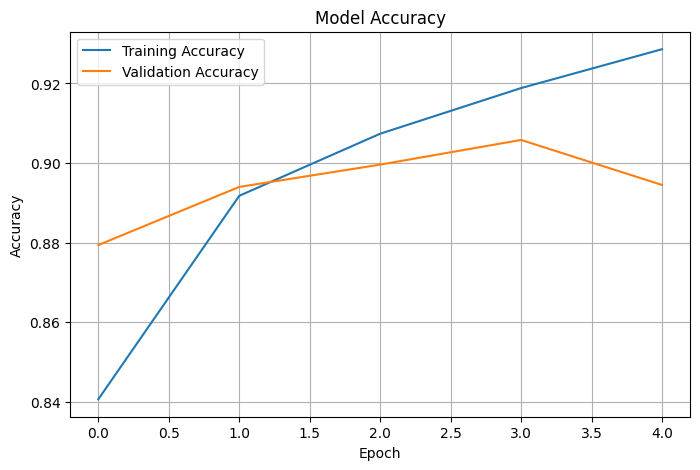

In [8]:
# 6. Plot the Simple Accuracy Graph
print("\n--- Plotting training history ---")
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()



--- Displaying individual predictions ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


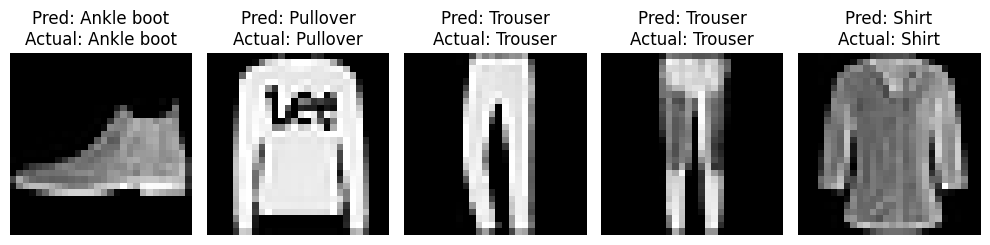

In [9]:
# 7. Test and Display 5 Sample Predictions
print("\n--- Displaying individual predictions ---")

predictions = model.predict(x_test[:5])
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = y_test[:5]

# Set up a 1x5 grid to display the images
plt.figure(figsize=(10, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    
    # Display the image (reshape to 28x28)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    
    # Set the title with prediction and actual label
    pred_name = class_names[predicted_labels[i]]
    actual_name = class_names[actual_labels[i]]
    plt.title(f"Pred: {pred_name}\nActual: {actual_name}")
    plt.axis('off')

plt.tight_layout()
plt.show()